In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Color blind friendly palette  (https://gist.github.com/thriveth/8560036)
plt.style.use('tableau-colorblind10')  
plt.style.library['tableau-colorblind10'] 

RcParams({'axes.prop_cycle': cycler('color', ['#006BA4', '#FF800E', '#ABABAB', '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']),
          'patch.facecolor': '#006BA4'})

# DATA ANALYSIS. URBAN FACTORS

In this notebook, we conduct a detailed statistical analysis of the main traits that characterize the specific public space where the surveys were conducted. For this, we use the **all_survey(stops).csv** dataset which contains the urban traits of each stop (210 stops in total). We use histograms and then we correlate the urban factors to the responses (median of TCV, TSV at each stop) and to the temperature recorded.

We will also use the **all_survey(votes).csv** to use all the responses to the thermal surveys instead of just the median of the votes in a given public space (when looking at the TCVs and TSVs)



### INDEX

<br>

1. General urban factors statistics

        1.1. NDVI
        
        1.2. Sky View Factor (SVF)

   
<br>       
       
       
2. Urban factors vs thermal votes (TCV, TSV)
        
        2.1. Using two categories of votes (Vote 2 and Vote 6)
            
                2.1.1. NDVI vs TCV
                2.1.2. NDVI vs TSV
                2.1.3. SVF vs TCV
                2.1.4. SVF vs TSV
                
        
        2.2. Grouping extrems (Vote 1 and Vote 2 // Vote 6 and Vote 7)
        
                2.2.1. NDVI vs TCV
                2.2.2. NDVI vs TSV
                2.2.3. SVF vs TCV
                2.2.4. SVF vs TSV
                

        2.3. Using all responses instead of median at each stop
              

## 0. Read data-sets

In [21]:
# Read csv data (please, write the correct directory adress where the data is located in your computer)
df_stops = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(stops).csv')  # stops
df_votes = pd.read_csv('Data_Repository_Heat_Chronicles\\aggregated_surveys\\all_surveys(votes).csv')  # votes

## 1. General urban factors statistics

We use the averaged values of NDVI and SVF in a radius of 1.5m around the location of the stop

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def custom_binned_histogram(df, column, num_bins=5, bin_precision=2, xlabel=None, ylabel='Frequency', figsize=(10, 8)):
    """
    Plot a custom histogram with manually defined bin edges and pretty labels.
    Also shows vertical lines for quantiles and mean with legend.

    Parameters:
    - df : pd.DataFrame
        DataFrame containing the column to plot.
    - column : str
        Name of the column to plot.
    - num_bins : int
        Number of bins for the histogram.
    - bin_precision : int
        Number of decimals in bin labels. If 0, uses integers.
    - xlabel : str
        Label for the X axis.
    - ylabel : str
        Label for the Y axis.
    - figsize : tuple
        Size of the figure.
    """
    
    fig, ax = plt.subplots(figsize=figsize)
    
    # Define bin edges
    min_val = df[column].min()
    max_val = df[column].max()
    bin_edges = np.linspace(min_val, max_val, num=num_bins + 1)

    # Plot histogram
    sns.histplot(data=df, x=column, bins=bin_edges, ax=ax,
                 facecolor='#A2C8EC', edgecolor='black')

    # Bin labels
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
    if bin_precision == 0:
        bin_labels = [f"{int(bin_edges[i])}–{int(bin_edges[i+1])}" for i in range(len(bin_edges) - 1)]
    else:
        bin_labels = [f"{round(bin_edges[i], bin_precision)}–{round(bin_edges[i+1], bin_precision)}"
                      for i in range(len(bin_edges) - 1)]

    ax.set_xticks(bin_centers)
    ax.set_xticklabels(bin_labels, fontsize=16)

    # Axis labels
    ax.set_xlabel(xlabel if xlabel else column, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

    # Quantiles
    q25, q50, q75 = df[column].quantile([0.25, 0.5, 0.75])
    mean_val = df[column].mean()

    ax.axvline(q25, color='gray', linestyle='--', linewidth=2, label='25th percentile',alpha=0.7)
    ax.axvline(q50, color='gray', linestyle='--', linewidth=2, label='50th percentile',alpha=0.7)
    ax.axvline(q75, color='gray', linestyle='--', linewidth=2, label='75th percentile',alpha=0.7)

    ax.axvline(mean_val, color='red', linestyle='-', linewidth=2, label='Mean',alpha=0.7)

    # Legend
    ax.legend(fontsize=14)

    plt.tight_layout()
    plt.show()
    
    
print('min NDVI = {}'.format(min(df_stops['NDVI_1.5m'])))
print('max NDVI = {}'.format(max(df_stops['NDVI_1.5m'])))
print('<NDVI> = {}'.format(df_stops['NDVI_1.5m'].mean()))

print('')

print('min SVF = {}'.format(min(df_stops['SVF_1.5m'])))
print('max SVF = {}'.format(max(df_stops['SVF_1.5m'])))
print('<SVF> = {}'.format(df_stops['SVF_1.5m'].mean()))



min NDVI = 0.540054
max NDVI = 0.809942
<NDVI> = 0.6629482428571429

min SVF = 15.38461538
max SVF = 92.2
<SVF> = 45.21869811095239


### 1.1. NDVI

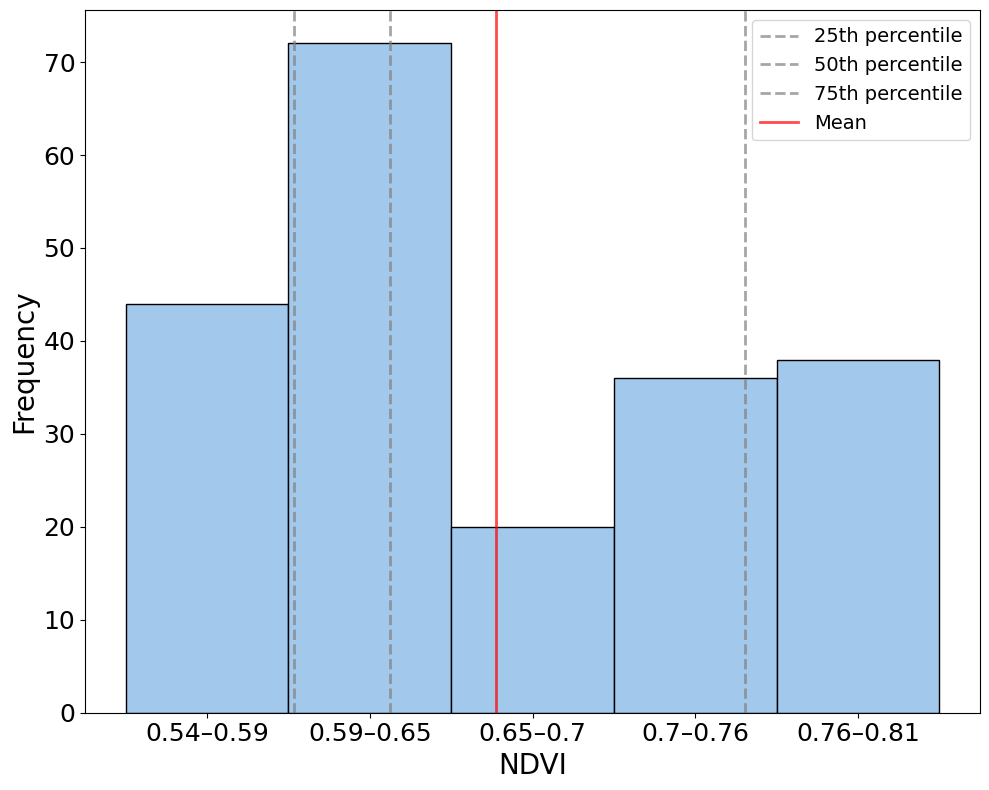

In [19]:
custom_binned_histogram(df_stops, 'NDVI_1.5m', xlabel = 'NDVI')

### 1.2. Sky View Factor (SVF)

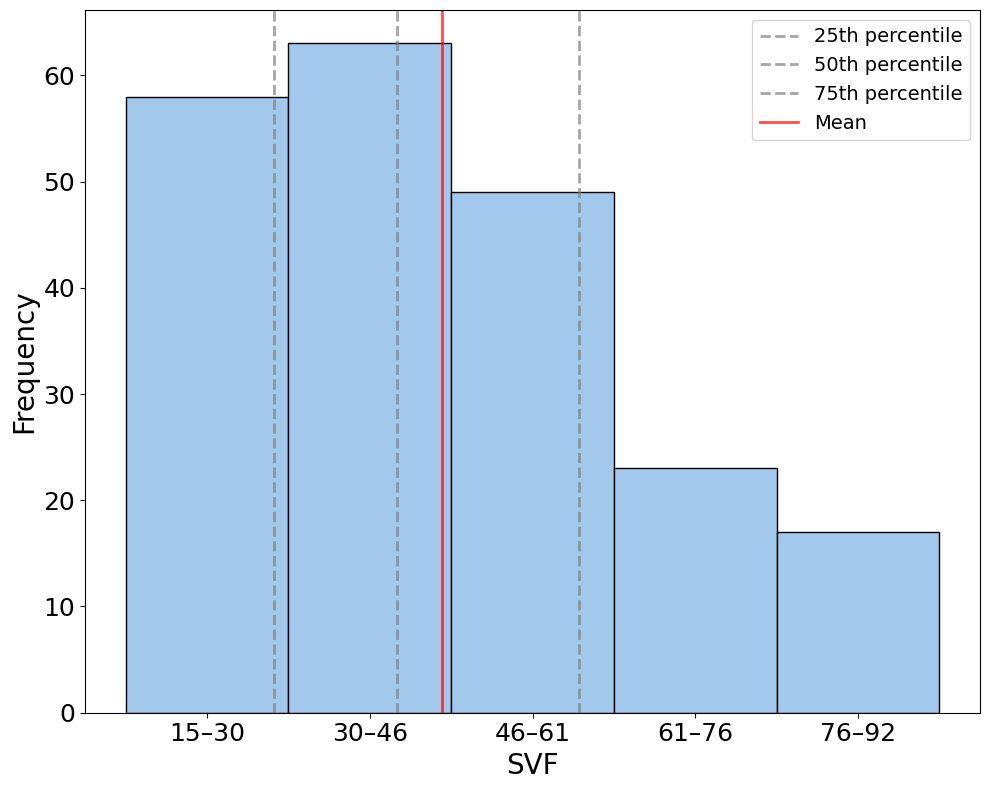

In [20]:
custom_binned_histogram(df_stops, 'SVF_1.5m', xlabel = 'SVF', bin_precision = 0)

## 2. Urban factors vs thermal votes (TCV, TSV)

### 2.1. Using two categories of votes (Vote 2 and Vote 6)

Using Vote 2 (TCV: Comfortable / TSV: Slighly cool) and Vote 6 (TCV: Uncomfortable / TSV: Hot)      
        

                

In [62]:
########################
#       SVF
########################

SVF_TCV2 = df_stops.loc[df_stops['median_comfort'] == 'Comfortable', ['SVF_1.5m']].reset_index(drop=True)  # Vote 2 TCV (Comfortable) 
SVF_TCV6 = df_stops.loc[df_stops['median_comfort'] == 'Uncomfortable', ['SVF_1.5m']].reset_index(drop=True) # Vote 6 TCV (Uncomfortable) 
SVF_TSV2 = df_stops.loc[df_stops['median_sensation'] == 'Slightly cool', ['SVF_1.5m']].reset_index(drop=True) # Vote 2 TSV (Slightly cool) 
SVF_TSV6 = df_stops.loc[df_stops['median_sensation'] == 'Hot', ['SVF_1.5m']].reset_index(drop=True) # Vote 6 TSV (Hot) 


########################
#       NDVI
########################

# Vote 2 (Comfortable)
NDVI_TCV2 = df_stops.loc[df_stops['median_comfort'] == 'Comfortable', ['NDVI_1.5m']].reset_index(drop=True) # Vote 2 TCV (Comfortable) 
NDVI_TCV6 = df_stops.loc[df_stops['median_comfort'] == 'Uncomfortable', ['NDVI_1.5m']].reset_index(drop=True) # Vote 6 TCV (Uncomfortable) 
NDVI_TSV2 = df_stops.loc[df_stops['median_sensation'] == 'Slightly cool', ['NDVI_1.5m']].reset_index(drop=True) # Vote 2 TSV (Slightly cool) 
NDVI_TSV6 = df_stops.loc[df_stops['median_sensation'] ==  'Hot', ['NDVI_1.5m']].reset_index(drop=True) # Vote 6 TSV (Hot


print('There are {} votes "Comfortable (2)"'.format(len(NDVI_TCV2)))
print('There are {} votes "Umcofortable (6)"'.format(len(NDVI_TCV6)))
print('')
print('There are {} votes "Slightly cool (2)"'.format(len(NDVI_TSV2)))
print('There are {} votes "Hot (6)"'.format(len(NDVI_TSV6)))



There are 14 votes "Comfortable (2)"
There are 21 votes "Umcofortable (6)"

There are 36 votes "Slightly cool (2)"
There are 28 votes "Hot (6)"


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def overlaid_histograms(
    df1, df2,
    column,
    label1='Group 1',
    label2='Group 2',
    num_bins=5,
    bin_precision=2,
    color1='#A2C8EC',
    color2='#FF800E',
    alpha1=0.99,
    alpha2=0.5,
    xlabel=None,
    ylabel='Frequency',
    fontsize=24
):
    """
    Plot two overlaid histograms on the same axis for comparison.

    Parameters:
    - df1, df2 : pd.DataFrame
        DataFrames to compare
    - column : str
        Name of the variable to plot
    - label1, label2 : str
        Labels for the legend
    - num_bins : int
        Number of bins
    - bin_precision : int
        Precision for bin labels (0 = int)
    - color1, color2 : str
        Colors for the bars
    - alpha1, alpha2 : float
        Transparency levels
    - xlabel, ylabel : str
        Axis labels
    - fontsize : int
        Base font size
    """

    # Define bin edges
    min_val = min(df1[column].min(), df2[column].min())
    max_val = max(df1[column].max(), df2[column].max())
    bin_edges = np.linspace(min_val, max_val, num=num_bins+1)
    bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

    # Define bin labels
    if bin_precision == 0:
        bin_labels = [f"{int(bin_edges[i])}–{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]
    else:
        bin_labels = [f"{bin_edges[i]:.{bin_precision}f}–{bin_edges[i+1]:.{bin_precision}f}" for i in range(len(bin_edges)-1)]

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 8))

    # Plot histograms
    sns.histplot(data=df1, x=column, bins=bin_edges, ax=ax,
                 color=color1, edgecolor='black', alpha=alpha1, label=label1)
    sns.histplot(data=df2, x=column, bins=bin_edges, ax=ax,
                 color=color2, edgecolor='black', alpha=alpha2, label=label2)

    # Axis formatting
    ax.set_xlabel(xlabel if xlabel else column, fontsize=fontsize)
    ax.set_ylabel(ylabel, fontsize=fontsize)
    plt.xticks(fontsize=fontsize - 4)
    plt.yticks(fontsize=fontsize - 4)

    ax.set_xticks(bin_centers)
    ax.set_xticklabels(bin_labels, fontsize=fontsize - 6)

    # Add legend
    ax.legend(fontsize=fontsize - 6)

    plt.tight_layout()
    plt.show()


#### 2.1.1. NDVI vs TCV

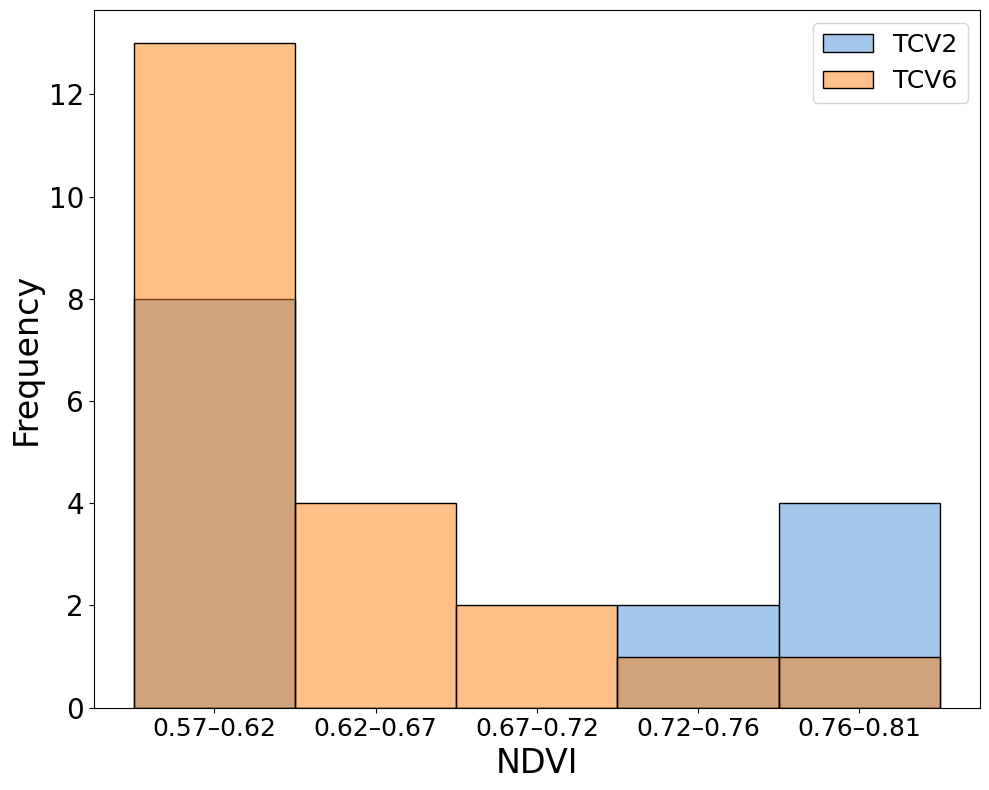

In [37]:
overlaid_histograms(
    df1=NDVI_TCV2,
    df2=NDVI_TCV6,
    column='NDVI_1.5m',
    label1='TCV2',
    label2='TCV6',
    num_bins=5,
    bin_precision=2,
    xlabel='NDVI'
)


#### 2.1.2. NDVI vs TSV

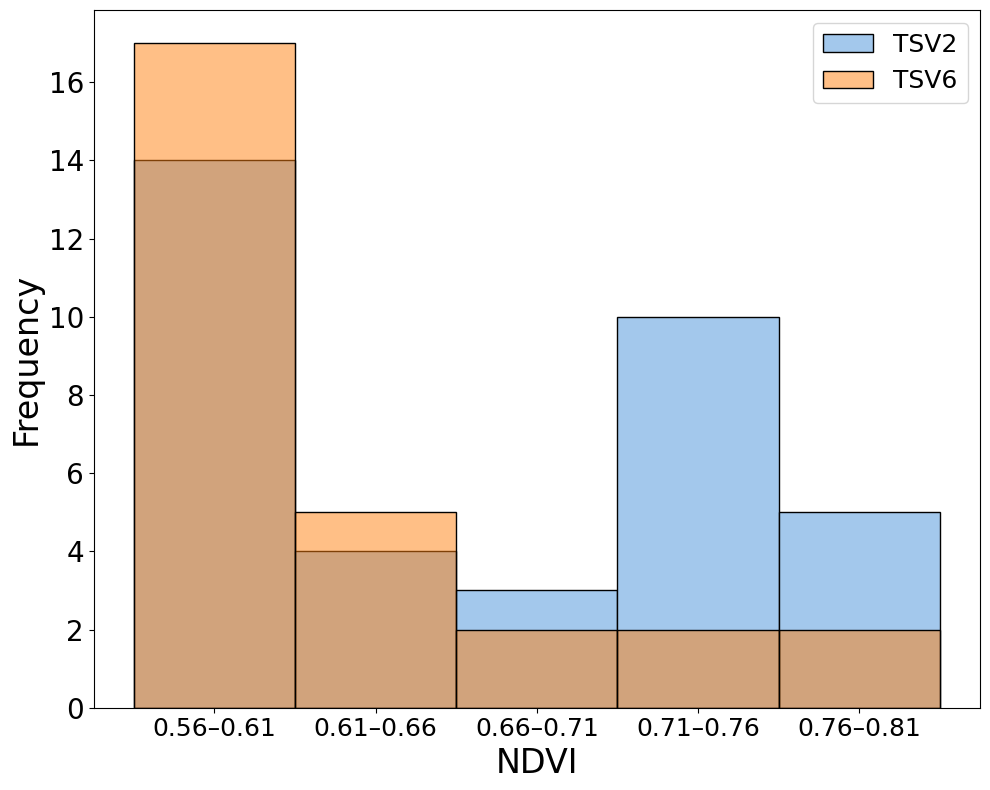

In [63]:
overlaid_histograms(
    df1=NDVI_TSV2,
    df2=NDVI_TSV6,
    column='NDVI_1.5m',
    label1='TSV2',
    label2='TSV6',
    num_bins=5,
    bin_precision=2,
    xlabel='NDVI'
)


#### 2.1.3. SVF vs TCV

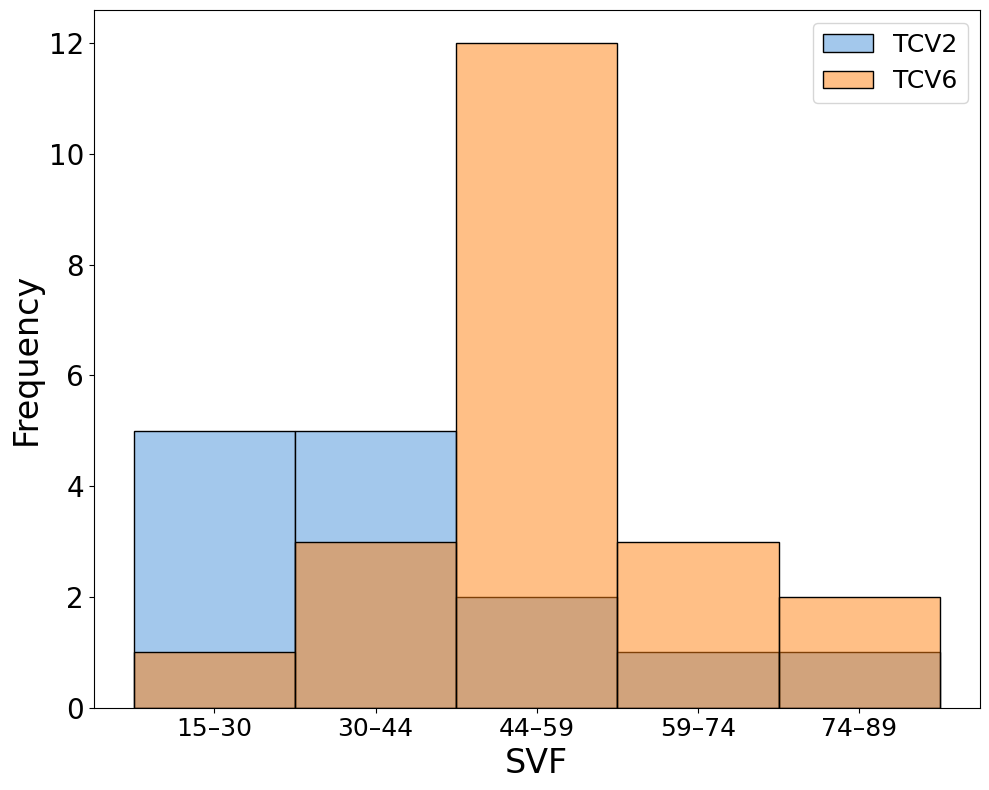

In [36]:
overlaid_histograms(
    df1=SVF_TCV2,
    df2=SVF_TCV6,
    column='SVF_1.5m',
    label1='TCV2',
    label2='TCV6',
    num_bins=5,
    bin_precision=0,
    xlabel='SVF'
)


#### 2.1.4. SVF vs TSV

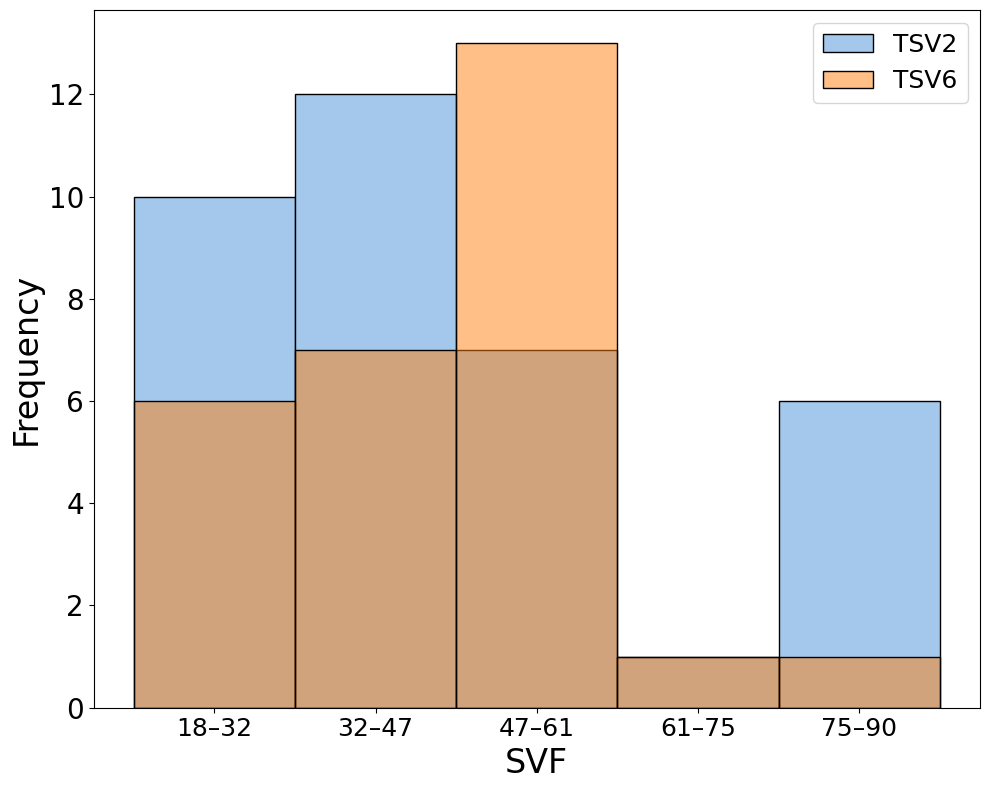

In [64]:
overlaid_histograms(
    df1=SVF_TSV2,
    df2=SVF_TSV6,
    column='SVF_1.5m',
    label1='TSV2',
    label2='TSV6',
    num_bins=5,
    bin_precision=0,
    xlabel='SVF'
)


### 2.2. Grouping extrems (Vote 1 and Vote 2 // Vote 6 and Vote 7)

Using Votes 1 and 2 (Very Comfortable and Comfortable // Cool and Slightly cool) and Votes 6 and 7 (Very uncomfortable and Uncomfortable // Hot and Very Hot)

In [65]:
SVF_TCV_1_2 = df_stops.loc[
    df_stops['median_comfort'].isin(['Very comfortable','Comfortable']),
    ['SVF_1.5m']
].reset_index(drop=True)


SVF_TCV_6_7 = df_stops.loc[
    df_stops['median_comfort'].isin(['Very uncomfortable','Uncomfortable']),
    ['SVF_1.5m']
].reset_index(drop=True)


SVF_TSV_1_2 = df_stops.loc[
    df_stops['median_sensation'].isin(['Cool', 'Slightly cool']),
    ['SVF_1.5m']
].reset_index(drop=True)


SVF_TSV_6_7 = df_stops.loc[
    df_stops['median_sensation'].isin(['Very hot','Hot']),
    ['SVF_1.5m']
].reset_index(drop=True)





NDVI_TCV_1_2 = df_stops.loc[
    df_stops['median_comfort'].isin(['Very comfortable','Comfortable']),
    ['NDVI_1.5m']
].reset_index(drop=True)


NDVI_TCV_6_7 = df_stops.loc[
    df_stops['median_comfort'].isin(['Very uncomfortable','Uncomfortable']),
    ['NDVI_1.5m']
].reset_index(drop=True)


NDVI_TSV_1_2 = df_stops.loc[
    df_stops['median_sensation'].isin(['Cool', 'Slightly cool']),
    ['NDVI_1.5m']
].reset_index(drop=True)


NDVI_TSV_6_7 = df_stops.loc[
    df_stops['median_sensation'].isin(['Very hot','Hot']),
    ['NDVI_1.5m']
].reset_index(drop=True)





print('There are {} votes "Very comfortable (1) and Comfortable (2) "'.format(len(NDVI_TCV_1_2)))
print('There are {} votes "Very uncomfortable (7) and Uncomfortable (6)"'.format(len(NDVI_TCV_6_7)))
print('')
print('There are {} votes "Cool (1) and Slightly cool (2)"'.format(len(NDVI_TSV_1_2)))
print('There are {} votes "Very Hot (7) and Hot (6) "'.format(len(NDVI_TSV_6_7)))


There are 14 votes "Very comfortable (1) and Comfortable (2) "
There are 27 votes "Very uncomfortable (7) and Uncomfortable (6)"

There are 36 votes "Cool (1) and Slightly cool (2)"
There are 31 votes "Very Hot (7) and Hot (6) "


#### 2.2.1 NDVI vs TCV

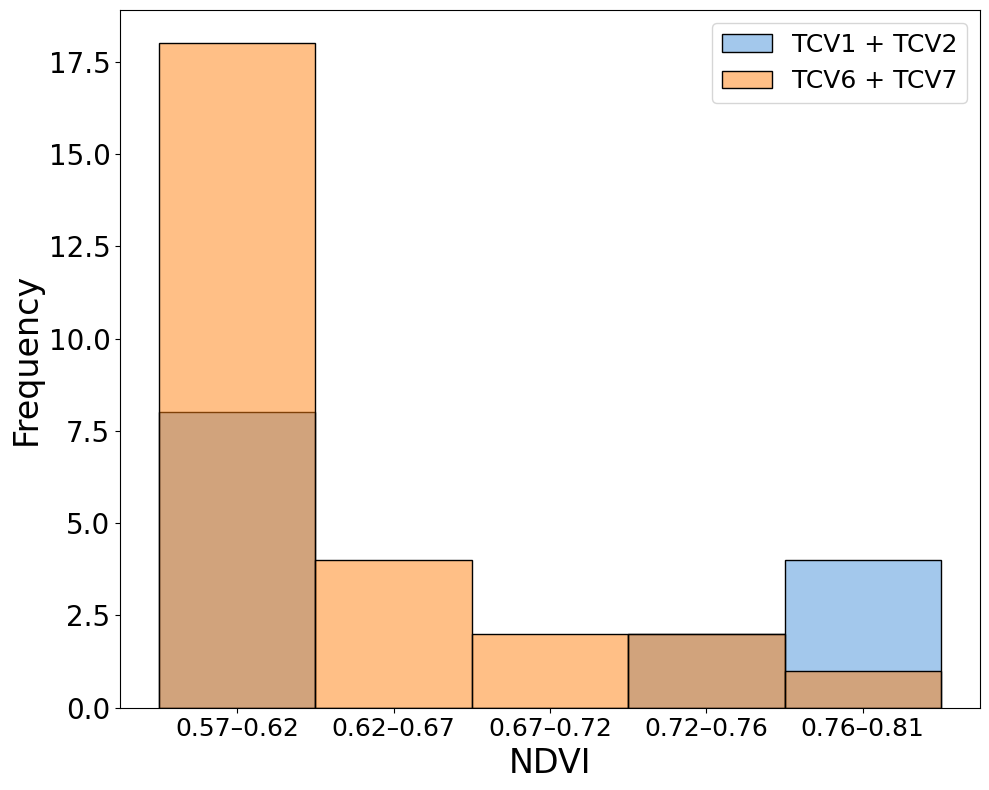

In [66]:
overlaid_histograms(
    df1=NDVI_TCV_1_2,
    df2=NDVI_TCV_6_7,
    column='NDVI_1.5m',
    label1='TCV1 + TCV2',
    label2='TCV6 + TCV7',
    num_bins=5,
    bin_precision=2,
    xlabel='NDVI'
)


#### 2.2.2. NDVI vs TSV

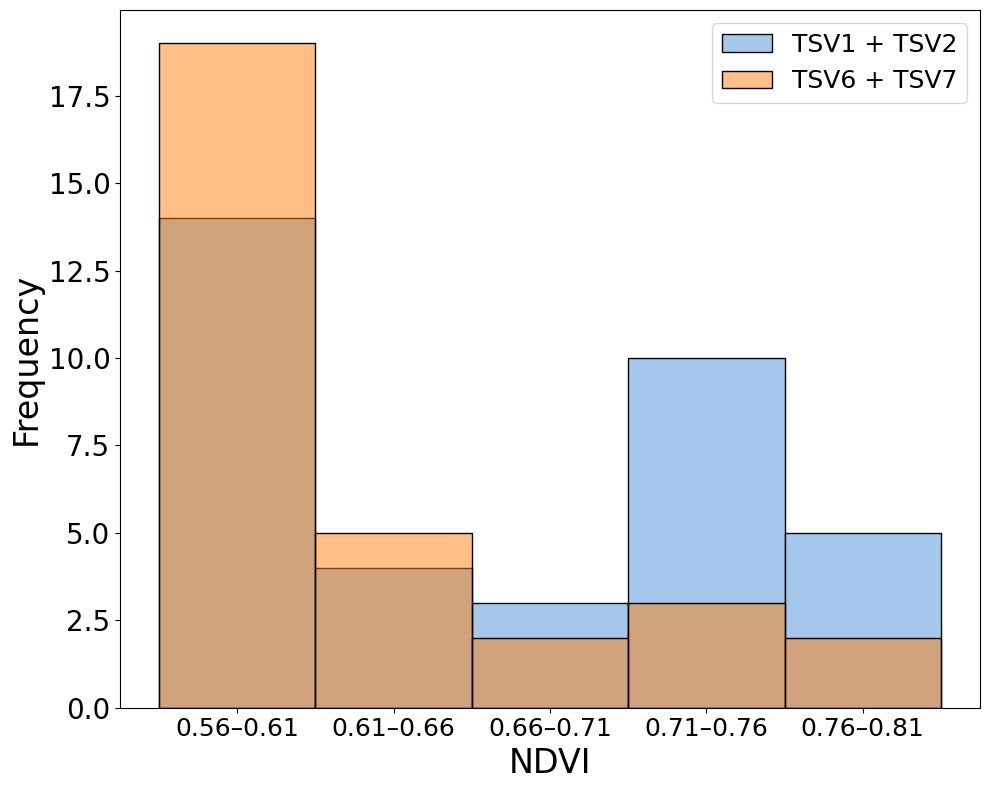

In [67]:
overlaid_histograms(
    df1=NDVI_TSV_1_2,
    df2=NDVI_TSV_6_7,
    column='NDVI_1.5m',
    label1='TSV1 + TSV2',
    label2='TSV6 + TSV7',
    num_bins=5,
    bin_precision=2,
    xlabel='NDVI'
)


#### 2.2.3 SVF vs TCV

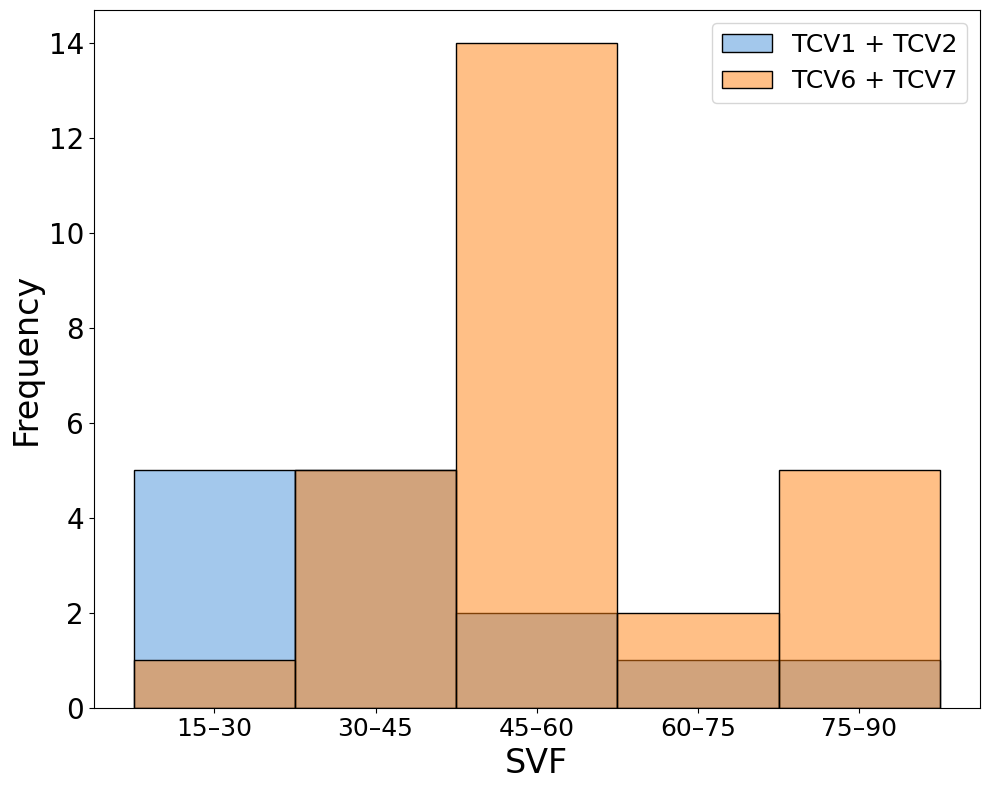

In [68]:
overlaid_histograms(
    df1=SVF_TCV_1_2,
    df2=SVF_TCV_6_7,
    column='SVF_1.5m',
    label1='TCV1 + TCV2',
    label2='TCV6 + TCV7',
    num_bins=5,
    bin_precision=0,
    xlabel='SVF'
)


#### 2.2.4. SVF vs TSV

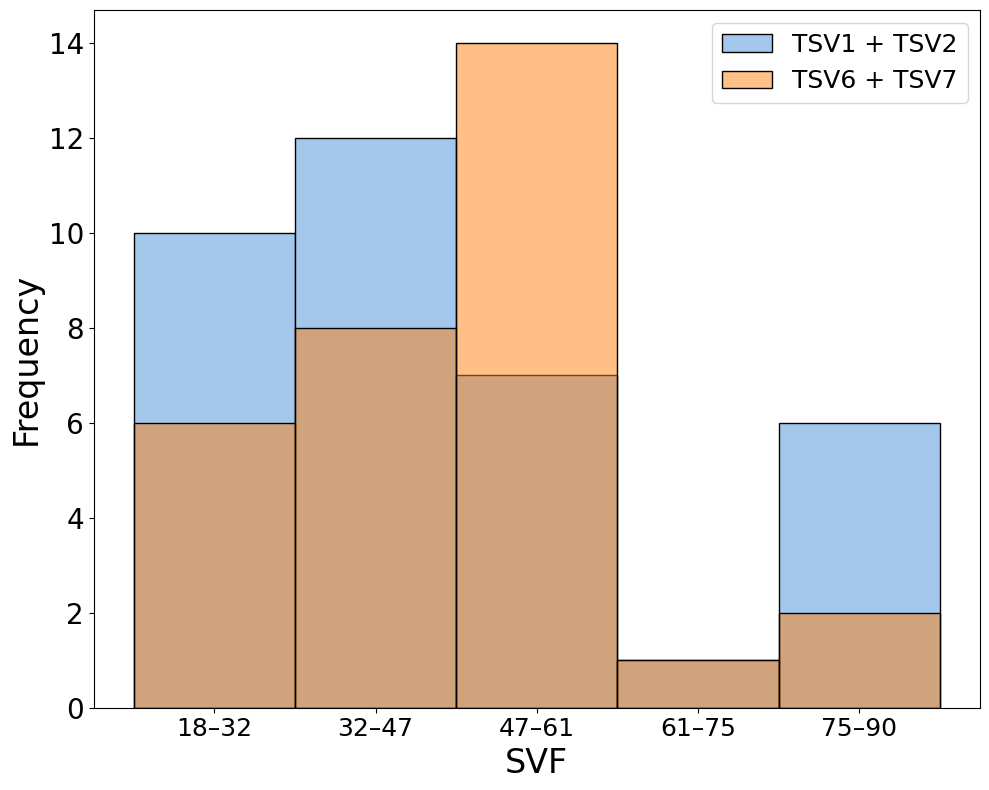

In [69]:
overlaid_histograms(
    df1=SVF_TSV_1_2,
    df2=SVF_TSV_6_7,
    column='SVF_1.5m',
    label1='TSV1 + TSV2',
    label2='TSV6 + TSV7',
    num_bins=5,
    bin_precision=0,
    xlabel='SVF'
)


## 2.3. Using all responses instead of median at each stop

We repeat the results but taking into acount all the 1,836 responses instead of the median at each stop (210 stops) to have more statistics.

Therefore, first we have to merge both datasets to have all the responses and all the urban factor traits



In [70]:
df_votes_merged = df_votes.merge(df_stops, on='space_code',how='inner')

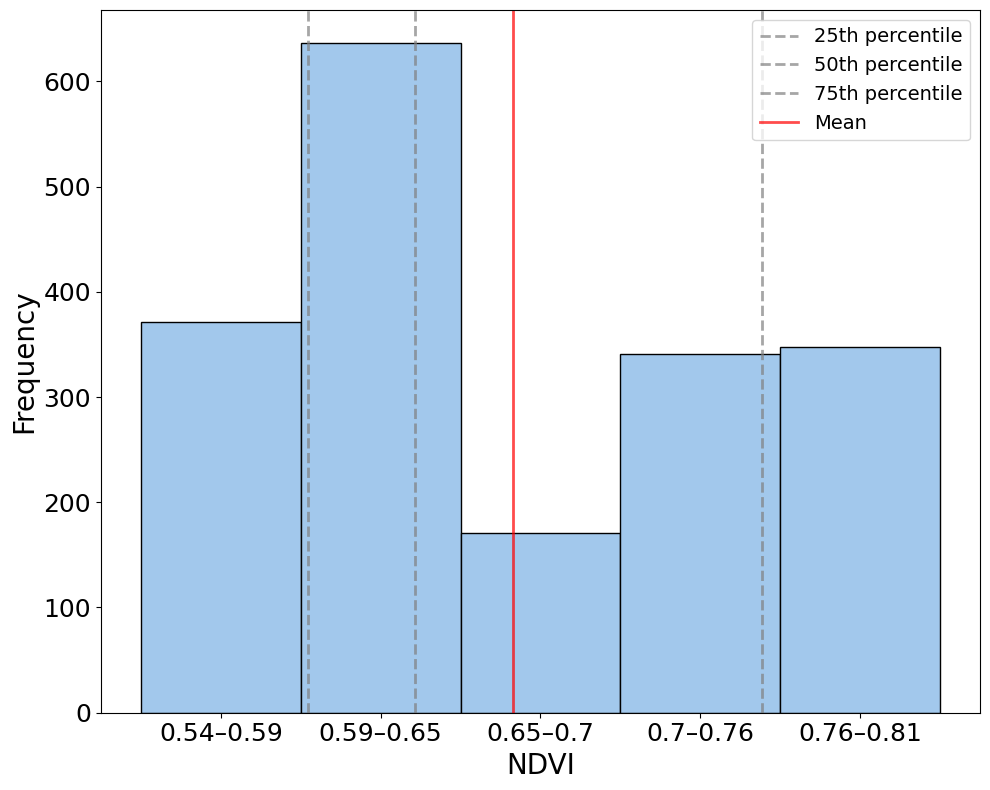

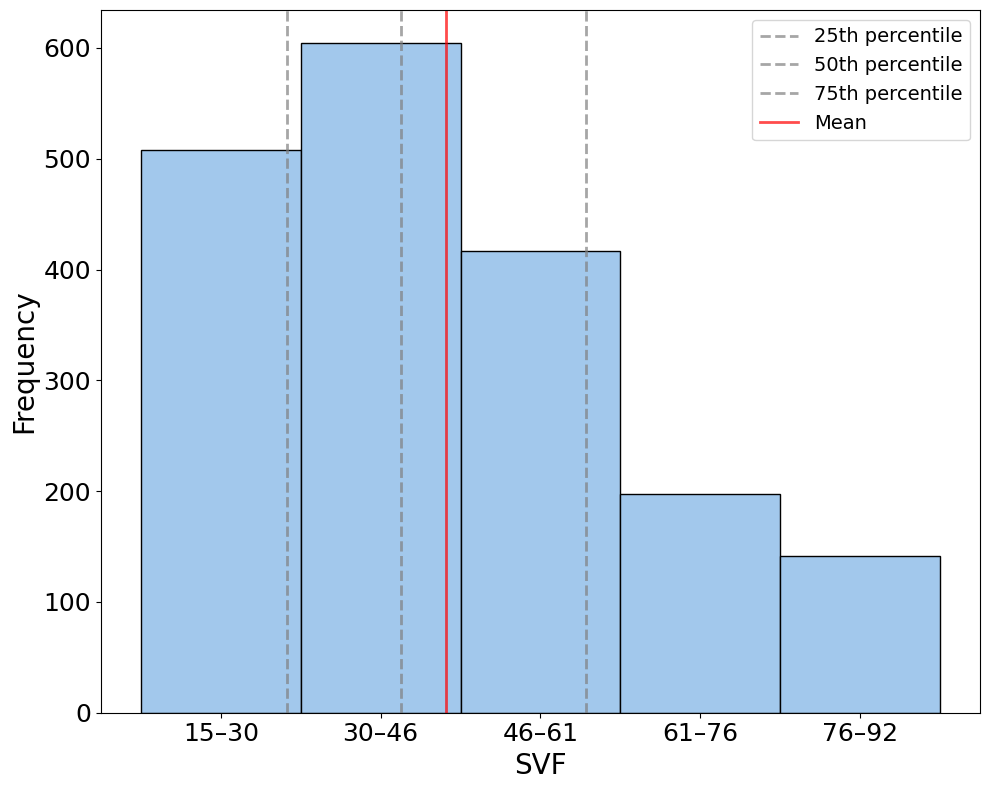

In [71]:
custom_binned_histogram(df_votes_merged, 'NDVI_1.5m', xlabel = 'NDVI')
custom_binned_histogram(df_votes_merged, 'SVF_1.5m', xlabel = 'SVF', bin_precision=0)

In [72]:
########################
#       SVF
########################

SVF_TCV2_votes = df_votes_merged.loc[df_votes_merged['thermal_comfort'] == 'Comfortable', ['SVF_1.5m']].reset_index(drop=True)  # Vote 2 TCV (Comfortable) 
SVF_TCV6_votes = df_votes_merged.loc[df_votes_merged['thermal_comfort'] == 'Uncomfortable', ['SVF_1.5m']].reset_index(drop=True) # Vote 6 TCV (Uncomfortable) 
SVF_TSV2_votes = df_votes_merged.loc[df_votes_merged['thermal_sensation'] == 'Slightly cool', ['SVF_1.5m']].reset_index(drop=True) # Vote 2 TSV (Slightly cool) 
SVF_TSV6_votes = df_votes_merged.loc[df_votes_merged['thermal_sensation'] == 'Hot', ['SVF_1.5m']].reset_index(drop=True) # Vote 6 TSV (Hot) 


########################
#       NDVI
########################

# Vote 2 (Comfortable)
NDVI_TCV2_votes = df_votes_merged.loc[df_votes_merged['thermal_comfort'] == 'Comfortable', ['NDVI_1.5m']].reset_index(drop=True) # Vote 2 TCV (Comfortable) 
NDVI_TCV6_votes = df_votes_merged.loc[df_votes_merged['thermal_comfort'] == 'Uncomfortable', ['NDVI_1.5m']].reset_index(drop=True) # Vote 6 TCV (Uncomfortable) 
NDVI_TSV2_votes = df_votes_merged.loc[df_votes_merged['thermal_sensation'] == 'Slightly cool', ['NDVI_1.5m']].reset_index(drop=True) # Vote 2 TSV (Slightly cool) 
NDVI_TSV6_votes = df_votes_merged.loc[df_votes_merged['thermal_sensation'] ==  'Hot', ['NDVI_1.5m']].reset_index(drop=True) # Vote 6 TSV (Hot


print('There are {} votes "Comfortable (2)"'.format(len(NDVI_TCV2_votes)))
print('There are {} votes "Umcofortable (6)"'.format(len(NDVI_TCV6_votes)))
print('')
print('There are {} votes "Slightly cool (2)"'.format(len(NDVI_TSV2_votes)))
print('There are {} votes "Hot (6)"'.format(len(NDVI_TSV6_votes)))



There are 320 votes "Comfortable (2)"
There are 209 votes "Umcofortable (6)"

There are 283 votes "Slightly cool (2)"
There are 342 votes "Hot (6)"


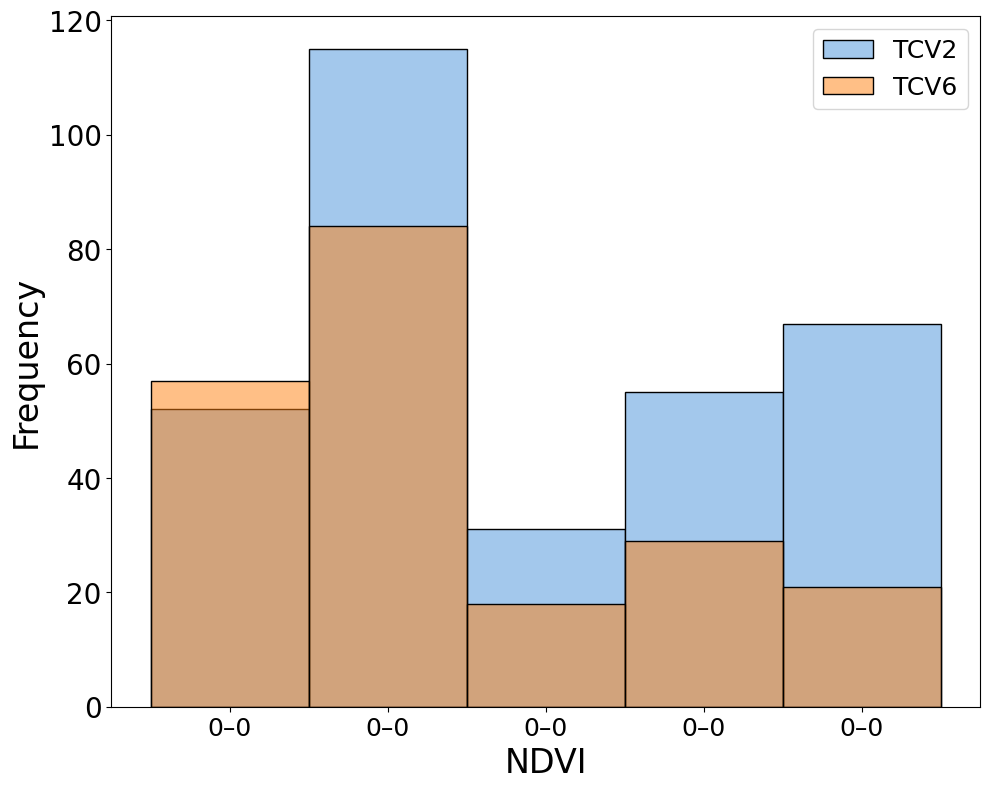

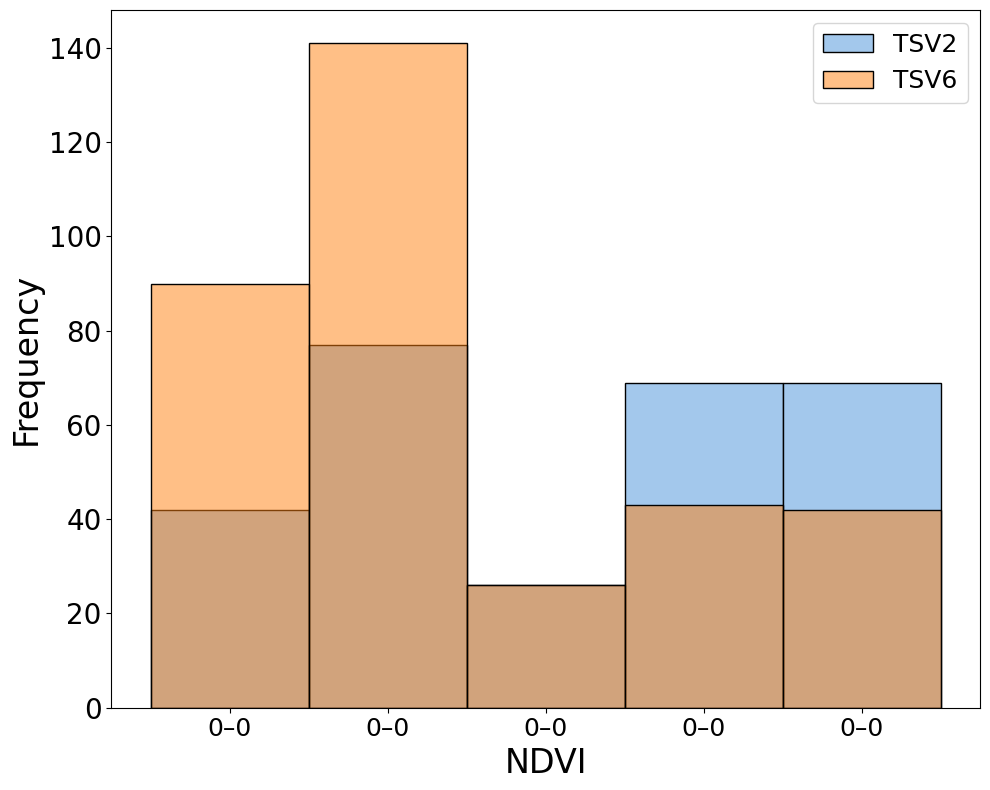

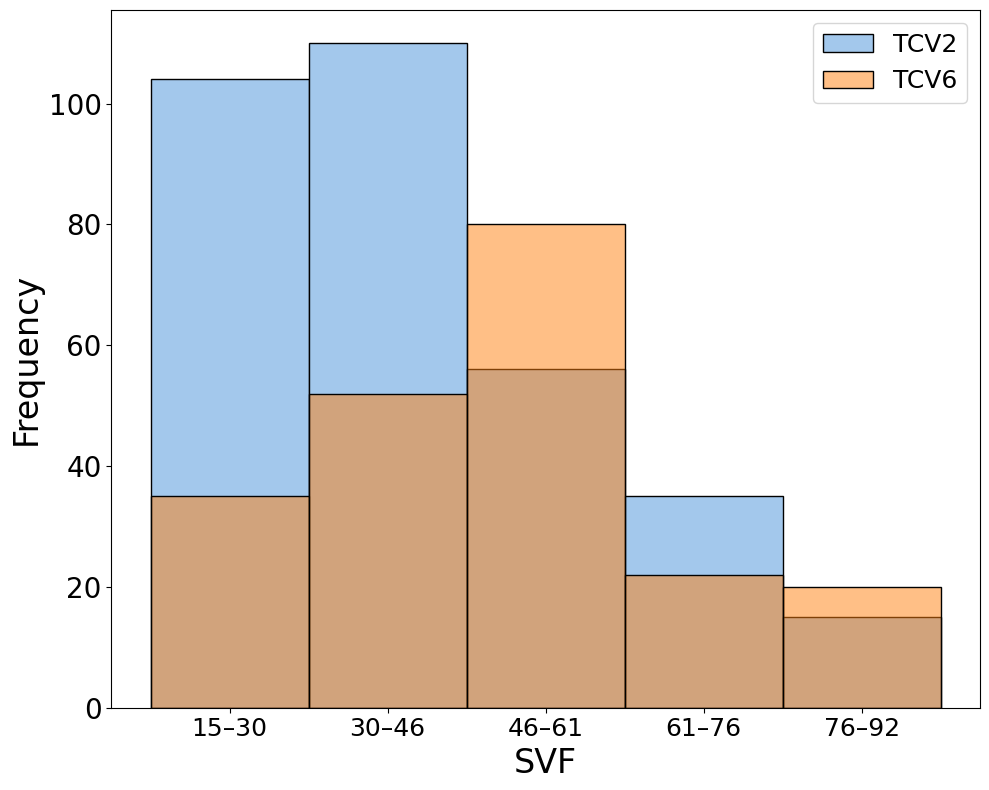

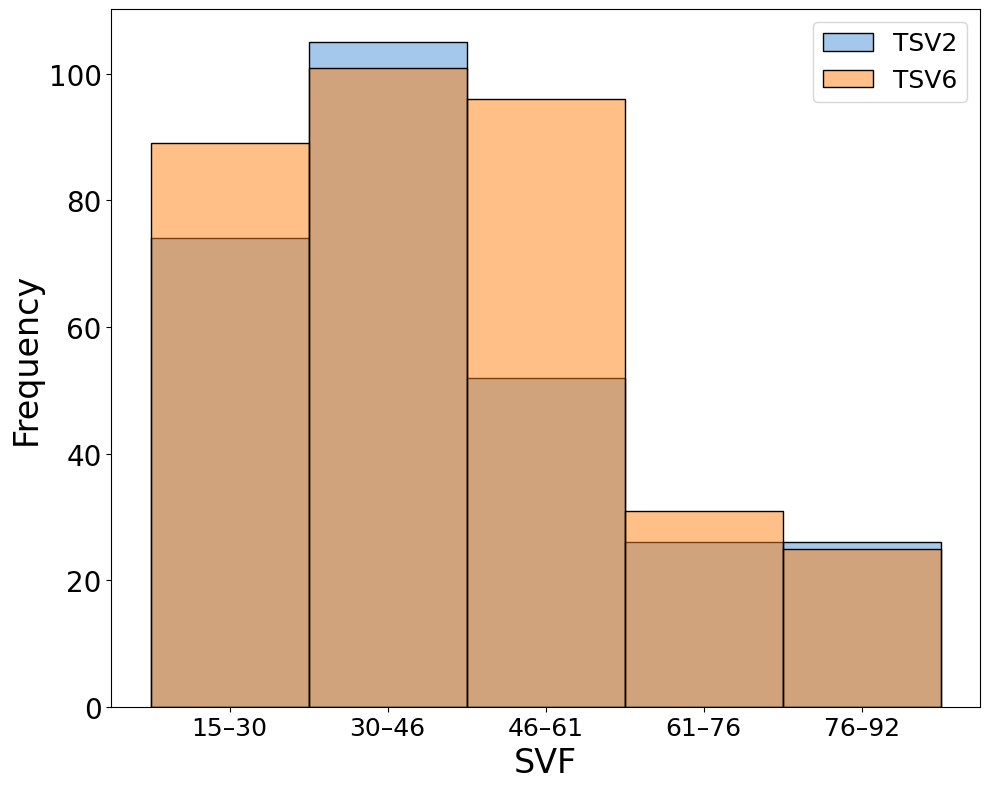

In [73]:
overlaid_histograms(
    df1=NDVI_TCV2_votes,
    df2=NDVI_TCV6_votes,
    column='NDVI_1.5m',
    label1='TCV2',
    label2='TCV6',
    num_bins=5,
    bin_precision=0,
    xlabel='NDVI'
)


overlaid_histograms(
    df1=NDVI_TSV2_votes,
    df2=NDVI_TSV6_votes,
    column='NDVI_1.5m',
    label1='TSV2',
    label2='TSV6',
    num_bins=5,
    bin_precision=0,
    xlabel='NDVI'
)



overlaid_histograms(
    df1=SVF_TCV2_votes,
    df2=SVF_TCV6_votes,
    column='SVF_1.5m',
    label1='TCV2',
    label2='TCV6',
    num_bins=5,
    bin_precision=0,
    xlabel='SVF'
)




overlaid_histograms(
    df1=SVF_TSV2_votes,
    df2=SVF_TSV6_votes,
    column='SVF_1.5m',
    label1='TSV2',
    label2='TSV6',
    num_bins=5,
    bin_precision=0,
    xlabel='SVF'
)
